# Pseudo-bayesian method

In [9]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_pseudo_bayesian import NewMethod

In [10]:
np.random.seed(0) 
SNRin = 10
N = 2**10
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear_2()
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

13.162319631874075


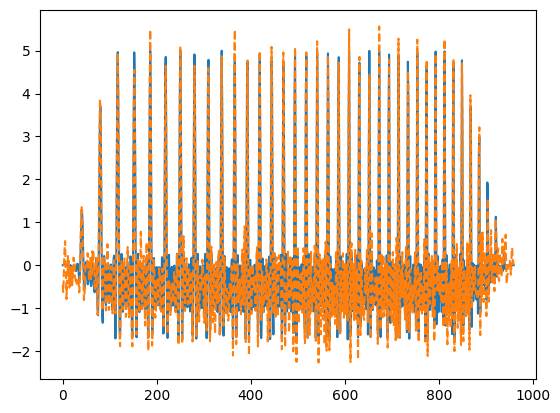

In [11]:
methodml = NewMethod()
funa = methodml.method
signal_output = funa(signal,)

S_output, F_output = get_spectrogram(signal_output)
F_output = F_output[0:N+1]

print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

plt.figure()
plt.plot(s[tmin:tmax])
plt.plot(signal_output[tmin:tmax],'--')

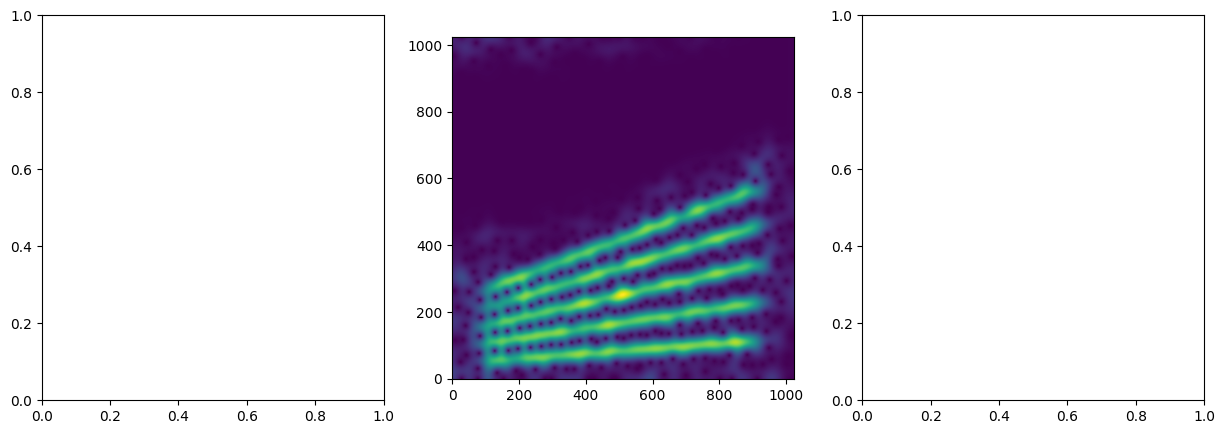

In [12]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
# ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
# ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
plt.show()

